Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [2]:
NAME = "Arnav Sinha"
COLLABORATORS = ""

---

# Problem description

To a large degree, financial data has traditionally been numeric in format.

But in recent years, non-numeric formats like image, text and audio have been introduced.  

Private companies have satellites orbiting the Earth taking photos and offering them to customers.  A financial analyst might be able to extract information from these photos that could aid in the prediction of the future price of a stock

- Approximate number of customers visiting each store: count number of cars in parking lot
- Approximate activity in a factory by counting number of supplier trucks arriving and number of delivery trucks leaving
- Approximate demand for a commodity at each location: count cargo ships traveling between ports

In this assignment, we will attempt to recognize ships in satellite photos.
This would be a first step toward
counting.

As in any other domain: specific knowledge of the problem area will make you a better analyst.
For this assignment, we will ignore domain-specific information and just try to use a labeled training set (photo plus a binary indicator for whether a ship is present/absent in the photo), assuming that the labels are perfect.



## Goal: 

In this notebook, you will need to create a model in `sklearn` to classify satellite photos.
- The features are images: 3 dimensional collection of pixels
  - 2 spatial dimensions
  - 1 dimension with 3 features for different parts of the color spectrum: Red, Green, Blue
- The labels are either 1 (ship is present) or 0 (ship is not present)


## Learning objectives
- Learn how to implement a model to solve a Classification task


# Imports modules

In [8]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math

%matplotlib inline

In [9]:
## Load the helper module
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%reload_ext autoreload
%autoreload 1

# Import nn_helper module
import helper
%aimport helper

helper = helper.Helper()

In [10]:
helper?

Type:        Helper
String form: <helper.Helper object at 0x00000232250A6000>
File:        c:\users\lenovo\desktop\ml\a2\as19390_20250219_hw2\helper.py
Docstring:   <no docstring>

In [11]:
helper

# API for students

We have defined some utility routines in a file `helper.py`. There is a class named `Helper` in it.  

This will simplify problem solving

More importantly: it adds structure to your submission so that it may be easily graded

`helper = helper.Helper()`

- getData: Get a collection of labeled images, used as follows

  >`data, labels = helper.getData()`
- showData: Visualize labelled images, used as follows

  >`helper.showData(data, labels)`
- model_interpretation: Visualize the model parameters
  
  >`helper.model_interpretation(Classifier)`

# Get the data

The first step in our Recipe is Get the Data.

We have provided a utility method `getData` to simplify this for you

In [14]:
# Get the data
data, labels = helper.getData()
n_samples, width, height, channel = data.shape

print("Data shape: ", data.shape)
print("Labels shape: ", labels.shape)
print("Label values: ", np.unique(labels))


Data shape:  (4000, 80, 80, 3)
Labels shape:  (4000,)
Label values:  [0 1]


Your expected outputs should be following      
`Date shape: (4000, 80, 80, 3)`           
`Labels shape: (4000,)`       
`Label values: [0 1]`        

We will shuffle the examples before doing anything else.

This is usually a good idea
- Many datasets are naturally arranged in a *non-random* order, e.g., examples with the sample label grouped together
- You want to make sure that, when you split the examples into training and test examples, each split has a similar distribution of examples

In [17]:
# Shuffle the data first
data, labels = sklearn.utils.shuffle(data, labels, random_state=42)

## Have a look at the data

We will not go through all steps in the Recipe, nor in depth.

But here's a peek

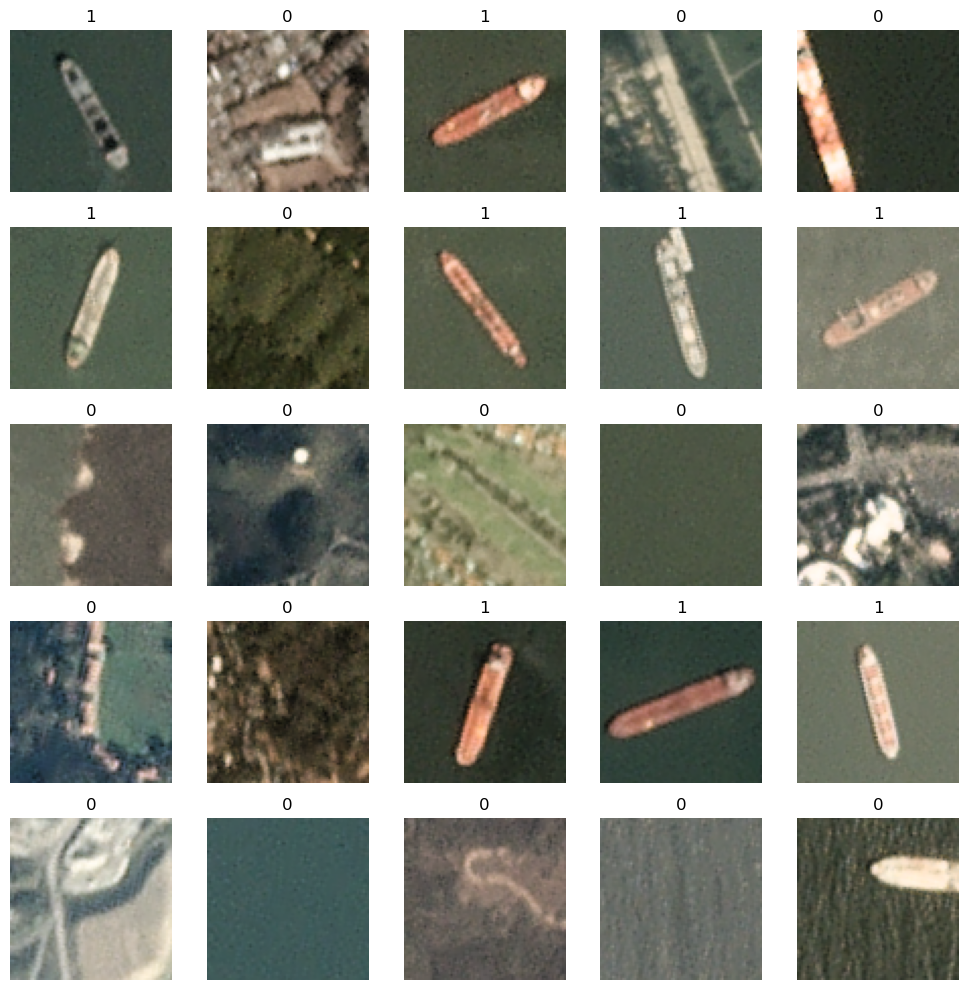

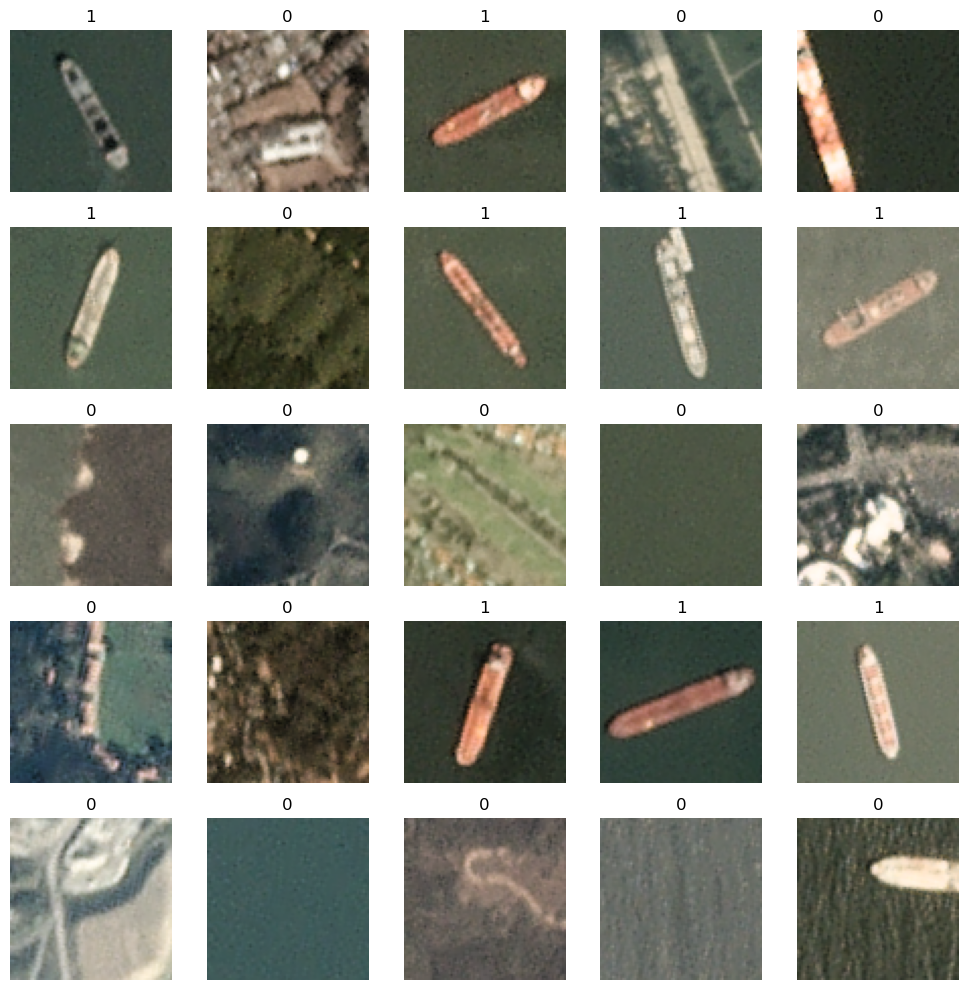

In [19]:
# Visualize the data samples
helper.showData(data[:25], labels[:25])

## Eliminate the color dimension

As a simplification, we will convert the image from color (RGB, with 3 "color" dimensions referred to as Red, Green and Blue) to gray scale.


In [21]:
print("Original shape of data: ", data.shape)

w = (.299, .587, .114)
data_bw = np.sum(data *w, axis=3)

print("New shape of data: ", data_bw.shape)

Original shape of data:  (4000, 80, 80, 3)
New shape of data:  (4000, 80, 80)


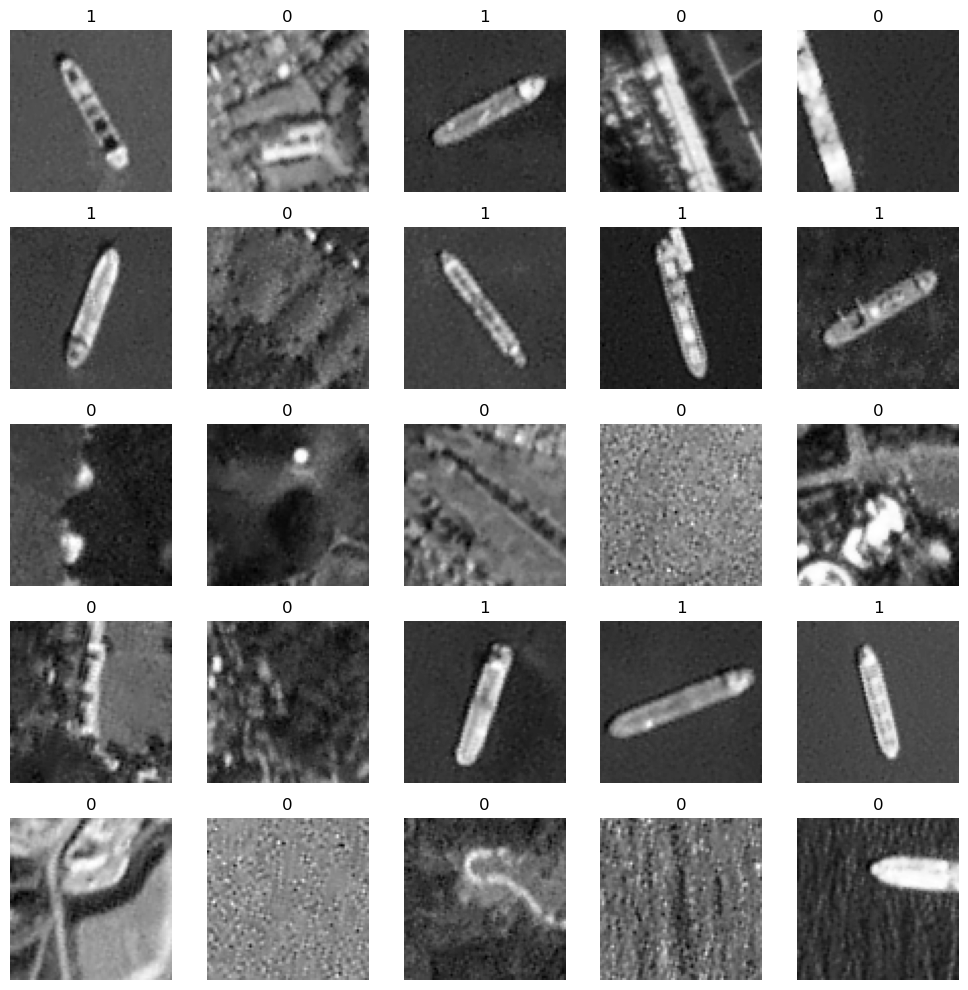

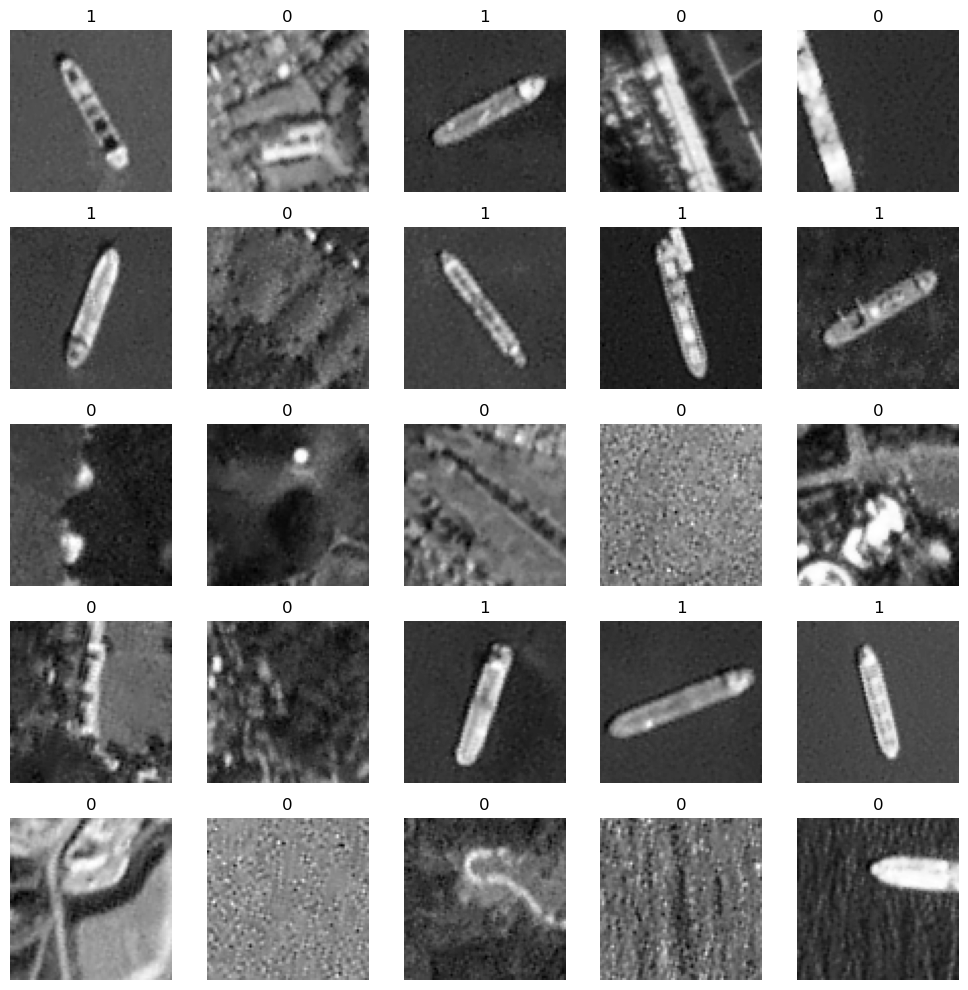

In [22]:
# Visualize the data samples
helper.showData(data_bw[:25], labels[:25], cmap="gray")

## Have  look at the data: Examine the image/label pairs

Rather than viewing the examples in random order, let's group them by label.

Perhaps we will learn something about the characteristics of images that contain ships.

We have loaded and shuffled our dataset, now we will take a look at image/label pairs. 

Feel free to explore the data using your own ideas and techniques.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20572\4090715245.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  _= fig.show()


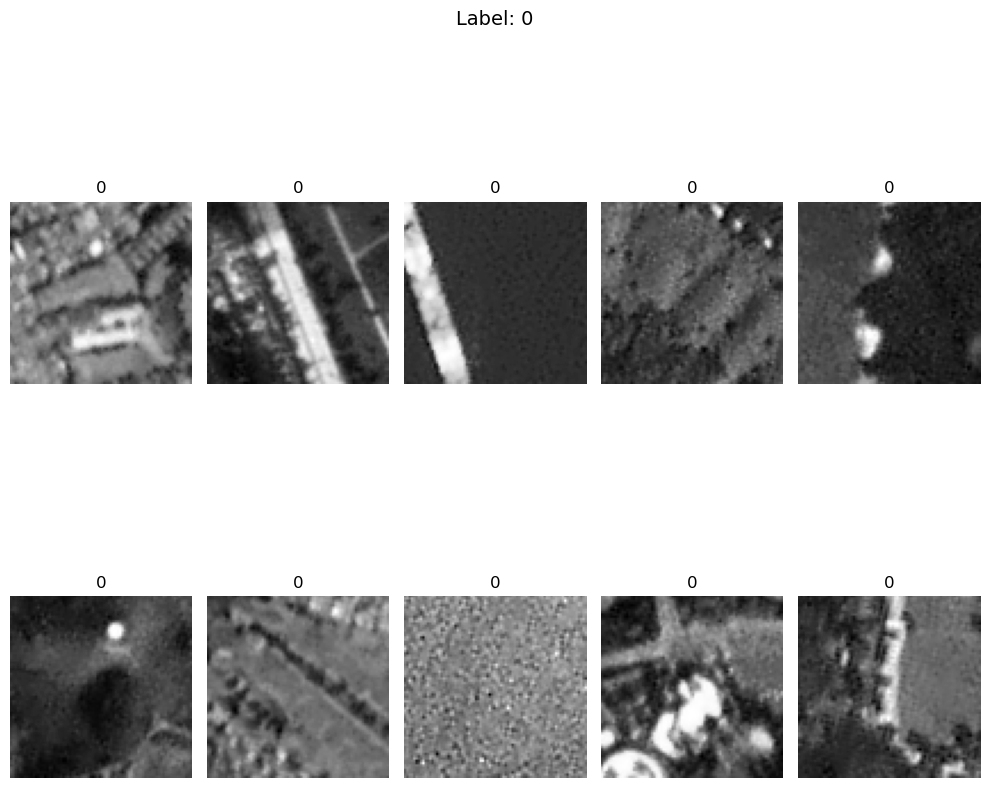

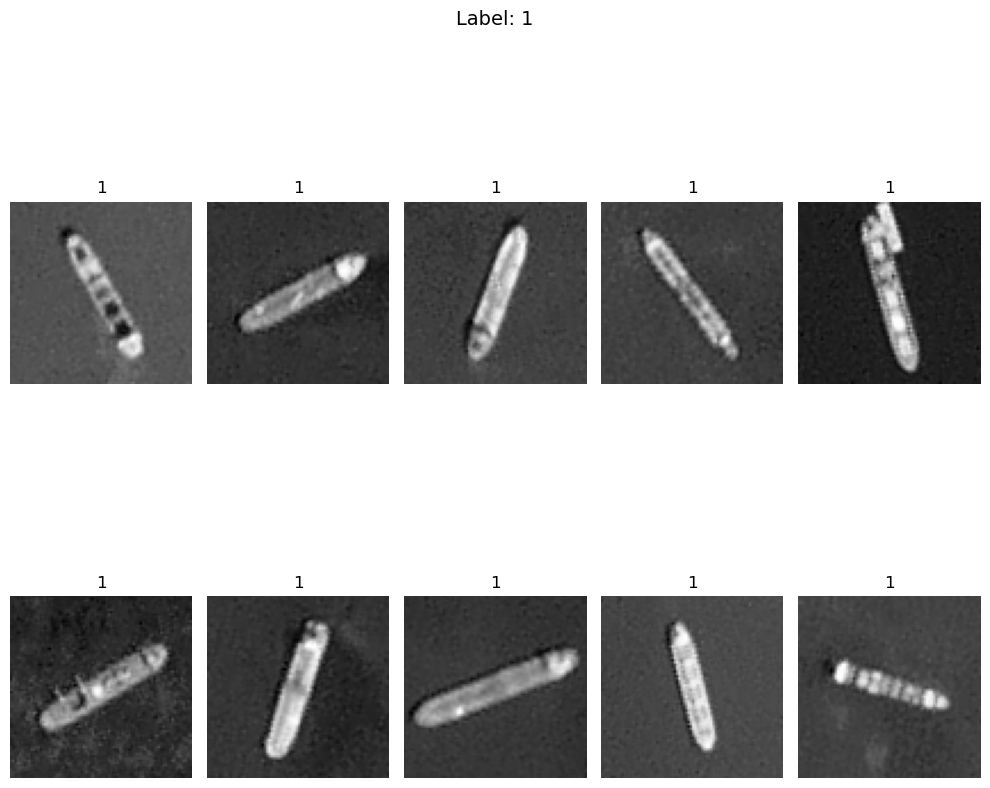

In [24]:
# Inspect some data (images)
num_each_label = 10

for lab in np.unique(labels):
    # Fetch images with different labels
    X_lab, y_lab = data_bw[ labels == lab ], labels[ labels == lab]
    # Display images
    fig = helper.showData( X_lab[:num_each_label], [ str(label) for label in y_lab[:num_each_label] ], cmap="gray")
    _= fig.suptitle("Label: "+  str(lab), fontsize=14)
    _= fig.show()
    print("\n\n")


It appears that a photo is labeled as having a ship present only if the ship is in the **center** of the photo. 

Perhaps this prevents us from double-counting.

In any event: we have learned something about the examples that may help us in building models
- Perhaps there is some feature engineering that we can perform to better enable classification

## Create a test set

To train and evaluate a model, we need to split the original dataset into
a training subset (in-sample) and a test subset (out of sample).

**Question:**

Split the data
- Set X_train, X_test, y_train and y_tests to match the description in the comment
- 90% will be used for training the model
- 10% will be used as validation (out of sample) examples

**Hint:**
- Use `train_test_split()` from `sklearn` to perform this split
    -  Set the `random_state` parameter of `train_test_split()` to be 42

We will help you by
- Assigning the feature vectors to X and the labels to y
- Flattening the two dimensional spatial dimensions of the features to a single dimension

In [27]:
from sklearn.model_selection import train_test_split

y = labels
X = data_bw

X_train = None
X_test = None
y_train = None
y_test = None

### Flatten X
X = X.reshape(X.shape[0], -1)

# Split data into train and test
# Create variables X_train, X_test, y_train, y_test
#   X_train: training examples
#   y_train: labels of the training examples
#   X_test:  test examples
#   y_test:  labels of test examples

# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (3600, 6400)
X_test shape:  (400, 6400)
y_train shape:  (3600,)
y_test shape:  (400,)


Your expected outputs should be following        
`X_train shape:  (3600, 6400)`      
`X_test shape:  (400, 6400)`      
`y_train shape:  (3600,)`       
`y_test shape:  (400,)`      


# Prepare the data and Classifier

**Questions:**

You will transform the data and create a Classifier.

The requirements are as follows:

- Transform the features (i.e., the pixel grids) into standardized values (mean 0, unit standard deviation)
    - Set a variable `scaler` to be your scaler
- Create an `sklearn` Classifier
    - Set variable `clf` to be be your Classifier object
    - We recommend trying Logistic Regression first
        - `sklearn`'s implementation of Logistic Regression has many parameter choices
        - We recommend starting with the single parameter `solver="liblinear"`
        - You may want to use the `sklearn` manual to learn about the other parameters

**Hints:**

- Look up `StandardScaler` in `sklearn`; this is a transformation to create standardized values
- You will use transformed examples both for training and test examples
    - So be sure that you can perform the transformation on both sets of examples
- Using `Pipeline` in `sklearn`, whose last element is a model, is a very convenient way to
    - Implement transformations and perform model fitting/prediction
    - In a way that ensures that all examples, both training and test, are treated consistently
    - Enables Cross Validation without cheating


In [30]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline


## Data Scaler
#  Create a StandardScaler object
#    scaler: sklearn standard scaler
scaler = None

# YOUR CODE HERE
scaler = StandardScaler()


## Classification Model
#  Create a classifier
#    clf: sklearn classifier
#    name: string, name of your classifier
#    model_pipeline: sklearn Pipeline, if you use pipeline, please use this variable
clf = None
name = None

# YOUR CODE HERE
clf = LogisticRegression(solver="liblinear")  # Initialize the logistic regression classifier
name = "Logistic Regression"  # Set the name of the classifier

# Create a pipeline to apply StandardScaler and then LogisticRegression
model_pipeline = Pipeline([
    ('scaler', scaler),   # First apply the scaler
    ('classifier', clf)   # Then apply the classifier
])

## Train model

**Question:**
- Use your Classifier or model pipeline to train your dataset and compute the in-sample accuracy
    - Set a variable `score_in_sample` to store the in-sample accuracy 

**Hint:**
- The `sklearn` function `accuracy_score` may be helpful


In [32]:
from sklearn.metrics import accuracy_score
# Set variable
# score_in_sample: a scalar number, score for your in-sample examples
score_in_sample = None

# YOUR CODE HERE
model_pipeline.fit(X_train, y_train)
y_train_pred = model_pipeline.predict(X_train)
score_in_sample = accuracy_score(y_train, y_train_pred)

print("Model: {m:s} in sample score={s:3.2f}\n".format(m=name, s=score_in_sample))

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(solver='liblinear'))])

Model: Logistic Regression in sample score=1.00



## Train the model using Cross Validation

Since we only have one test set, we want to use 5-fold cross validation check model performance.

**Question:**
- Use 5-fold Cross Validation
    - Set `cross_val_scores` as your scores of k-fold results
    - Set `k` as the number of folds
    - Report the average score


**Hint:**
- `cross_val_score` in `sklearn` will be useful


In [34]:
# Set variable 
#  scores: an array of scores (length 5), one for each fold that is out-of-sample during cross-validation
#  k: number of folds
cross_val_scores = None
k = 5

t0 = time.time()

# YOUR CODE HERE
cross_val_scores = cross_val_score(model_pipeline, X_train, y_train, cv=k)
t1 = time.time()

print("Model: {m:s} avg cross validation score={s:3.2f}\n".format(m=name, s=cross_val_scores.mean()) )
print("Cross-validation took: {:.2f} seconds".format(t1 - t0))

Model: Logistic Regression avg cross validation score=0.87

Cross-validation took: 198.89 seconds


# How many parameters in the model ?

**Question:** 

- Calculate the number of parameters in your model. Report only the number of *non-intercept* parameters. 
   - Set `num_parameters` to store the number of parameters

**Hint:** 

- The model object may have a method to help you ! Remember that Jupyter can help you find the methods that an object implements.


In [36]:
# Set num_parameters equal to the number of non-intercept parameters in the model
num_parameters = None

# YOUR CODE HERE
model_pipeline.fit(X_train, y_train)
num_parameters = clf.coef_.shape[1]

print("\nShape of intercept: {i}; shape of coefficients: {c}".format(i=clf.intercept_.shape,
                                                                   c=num_parameters) )

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(solver='liblinear'))])


Shape of intercept: (1,); shape of coefficients: 6400


# Evaluate the model

**Question:**

We have trained our model. We now need to  evaluate the model using the test dataset created in an earlier cell.

Please store the model accuracy on the test set in a variable named `score_out_of_sample`.   

**Hint:**
- If you have transformed examples for training, you must perform the same transformation for test examples !

- Remember: you *fit* the transformations only on the training examples, not on the test examples !

In [38]:
# Set variable to store the model accuracy on the test set
score_out_of_sample = None

# YOUR CODE HERE
y_test_pred = model_pipeline.predict(X_test)
score_out_of_sample = accuracy_score(y_test, y_test_pred)

print("Model: {m:s} out-of-sample score={s:3.2f}\n".format(m=name, s=score_out_of_sample))

Model: Logistic Regression out-of-sample score=0.85



# Visualize the parameters

Remember: there is a one-to-one association between parameters and input features (pixels).

So we can arrange the parameters into the same two dimensional grid structure as images.

This might tell us what "pattern" of features the model is trying to match.

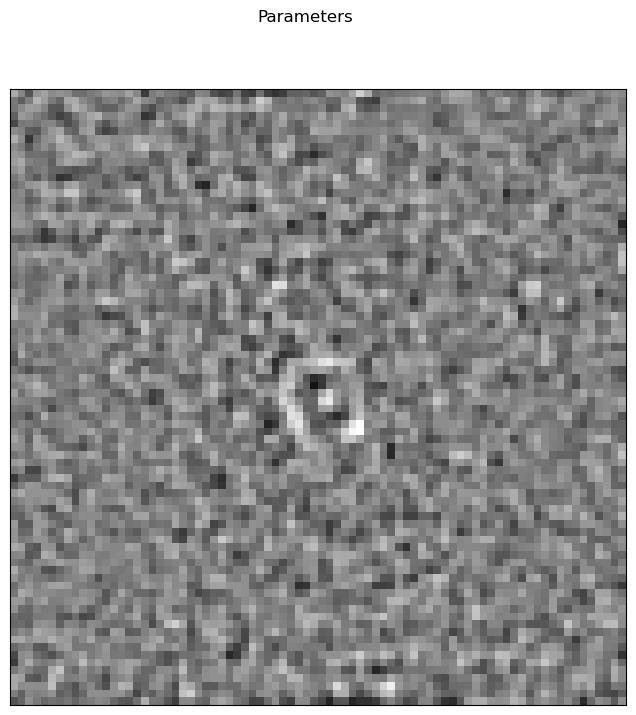

In [40]:
helper.model_interpretation(clf)

# Further Exploration (Optional)
Now you can build your own model using what you have learned from the course. Some ideas to try:
- Was it a good idea to drop the "color" dimension by converting the 3 color channels to a single one ?
- Can you interpret the coefficients of the model ?  Is there a discernible "pattern" being matched ?
- Feature engineering !
    - Come up with some ideas for features that may be predictive, e.g, patterns of pixels
    - Test them
- Use Error Analysis to guide your feature engineering
- Add a *regularization penalty* to your loss function
    - How does this affect
        - The in-sample fit ?
        - The visualization of the parameters
    - **Hint**: The `sklearn` `LogisticRegression` model
        - has several choices for the `penalty` parameter
        - has a variable value for the regularization strength parameter `C`

Observe the effect of each change on the Loss and Accuracy.


## Installing Necessary Libraries



In [43]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


## Greyscale vs Color 

In [46]:
# Flatten the original color images (without grayscale conversion)
X_color = data.reshape(data.shape[0], -1)

# Train-test split
X_train_color, X_test_color, y_train, y_test = train_test_split(X_color, y, test_size=0.1, random_state=42)

# Standardize the data
scaler_color = StandardScaler()
X_train_color = scaler_color.fit_transform(X_train_color)
X_test_color = scaler_color.transform(X_test_color)

# Train Logistic Regression on Color Data
clf_color = LogisticRegression(solver="liblinear")
clf_color.fit(X_train_color, y_train)

# Evaluate model performance
y_train_pred_color = clf_color.predict(X_train_color)
y_test_pred_color = clf_color.predict(X_test_color)

train_acc_color = accuracy_score(y_train, y_train_pred_color)
test_acc_color = accuracy_score(y_test, y_test_pred_color)

print(f"Train Accuracy (Color): {train_acc_color:.2f}")
print(f"Test Accuracy (Color): {test_acc_color:.2f}")


LogisticRegression(solver='liblinear')

Train Accuracy (Color): 1.00
Test Accuracy (Color): 0.90


### Logic and My Understanding for doing this

Flattening the Original Color Images:
First, I reshape the original color images (RGB format) into 1D arrays. Each image is 80x80 pixels with 3 color channels (RGB), so I flatten each image into a single vector of length 80 * 80 * 3 = 19,200. Now, I have all my images stored as 1D arrays in X_color.

Train-Test Split:
Next, I split the dataset into training and testing sets. I allocate 90% of the data to the training set and the remaining 10% to the testing set, ensuring the data is shuffled and split randomly.

Standardization:
I standardize the data by scaling it to have a mean of 0 and a standard deviation of 1. This helps the model perform better by normalizing the feature values. I apply this scaling to both the training and testing sets, ensuring I only scale the test set using the parameters derived from the training set (fit on training, transform on both).

Training the Logistic Regression Model:
After standardizing the data, I initialize a logistic regression model (clf_color). I then train this model using the training set (both the features X_train_color and the labels y_train).

### Conclusion:

The test accuracy has improved which shows that it was NOT a good idea to drop the "color" dimension by converting the 3 color channels to a single one. Instead we see that the Test Accuracy has jumped to 0.90. 

## Visualizing the Learned Coefficients for Each Color Channel (RGB)

Text(0.5, 1.0, 'Coefficient Heatmap: Red')

(-0.5, 79.5, 79.5, -0.5)

Text(0.5, 1.0, 'Coefficient Heatmap: Green')

(-0.5, 79.5, 79.5, -0.5)

Text(0.5, 1.0, 'Coefficient Heatmap: Blue')

(-0.5, 79.5, 79.5, -0.5)

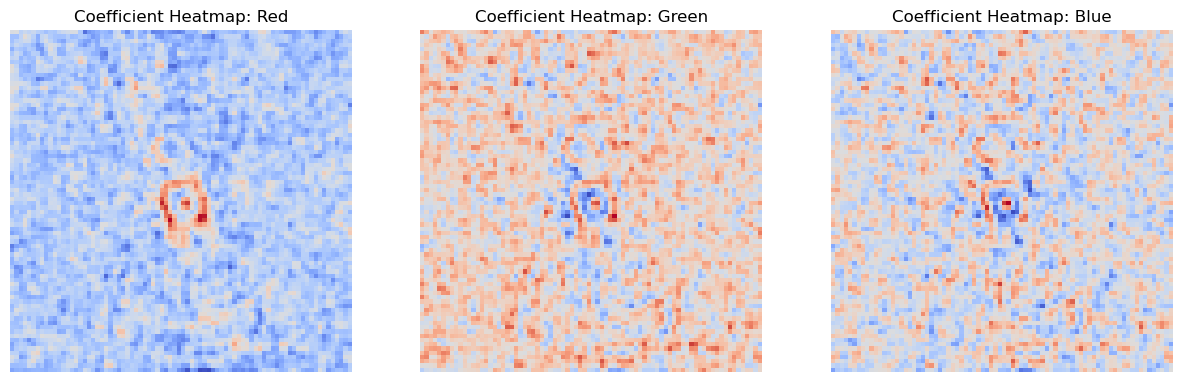

In [52]:
coefficients = clf_color.coef_.reshape(1, 80, 80, 3)  # Reshape back to image dimensions
coefficients = coefficients.squeeze()  # Remove the first dimension (1, 80, 80, 3) -> (80, 80, 3)

# Plot coefficient heatmap for each channel
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
color_channels = ['Red', 'Green', 'Blue']

for i in range(3):
    ax = axes[i]
    ax.imshow(coefficients[:, :, i], cmap='coolwarm', interpolation='nearest')
    ax.set_title(f'Coefficient Heatmap: {color_channels[i]}')
    ax.axis('off')

plt.show()


### What I Learned from this code?

It visualizes how the logistic regression model has learned to assign importance to different   regions of the image for each color channel (Red, Green, Blue).

Each subplot shows a heatmap of the coefficients for one color channel. The intensity of the heatmap indicates the strength of the contribution of each pixel in that channel to the model's decision.

For example, if the coefficient for a certain pixel in the Red channel is high, it means that the Red color in that pixel plays a strong role in predicting whether a ship is present or not.

### Observations

Red Channel: There seems to be a noticeable pattern in the centre. This suggests the model may be focusing on key features in this channel.

Green and Blue Channels: More scattered weights. Still, some focus is in the centre, but less structured than the red channel.


## Extract Edge Features (Sobel Filter)

In [56]:
from scipy.ndimage import sobel

def extract_edges(images):
    edge_features = np.array([sobel(img) for img in images])  # Apply Sobel filter
    return edge_features.reshape(images.shape[0], -1)  # Flatten for ML model

X_edges = extract_edges(data_bw)
X_train_edges, X_test_edges, _, _ = train_test_split(X_edges, y, test_size=0.1, random_state=42)

# Scale and Train Model
scaler_edges = StandardScaler()
X_train_edges = scaler_edges.fit_transform(X_train_edges)
X_test_edges = scaler_edges.transform(X_test_edges)

clf_edges = LogisticRegression(solver="liblinear")
clf_edges.fit(X_train_edges, y_train)

y_test_pred_edges = clf_edges.predict(X_test_edges)
test_acc_edges = accuracy_score(y_test, y_test_pred_edges)

print(f"Test Accuracy (Edge Features): {test_acc_edges:.2f}")


LogisticRegression(solver='liblinear')

Test Accuracy (Edge Features): 0.81


### How the Sobel Filter Works:

1. The function extract_edges(images) applies the Sobel filter to detect edges in each image in the images array.
2. The Sobel filter is commonly used to find edges in images by computing the gradient magnitude of pixel intensities. It highlights areas where there are sharp changes in intensity (edges).
3. sobel(img) applies the Sobel filter to each image individually (from the array images).
4. The result is stored in edge_features, which is a 4D array containing the edges detected in each image.
5. After detecting the edges, the feature array is reshaped into a 2D array, flattening each image (with edge features) into a single vector for each image, making it suitable for machine learning models.
6. The extract_edges() function is called on the grayscale images data_bw, which were previously created (with one color channel instead of three). This results in X_edges, a 2D array where each row is a flattened vector of edge features from a grayscale image.
                                                                                                                                                                            


### Conclusion Drawn:


Nutshell: This code focuses on using edge features (rather than raw pixel values) to classify the images. The Sobel filter highlights areas where there is a significant change in intensity, which can help the model identify edges of ships or other objects in the images.

The Test Accuracy decreased a bit from when e used raw pixel values. Ideally, we would not prefer using edge features for our task. 

Regularization & Hyperparameter Tuning
Logistic Regression allows L1 (Lasso) and L2 (Ridge) regularization. Let's tune the C parameter.

## ERROR ANALYSIS 

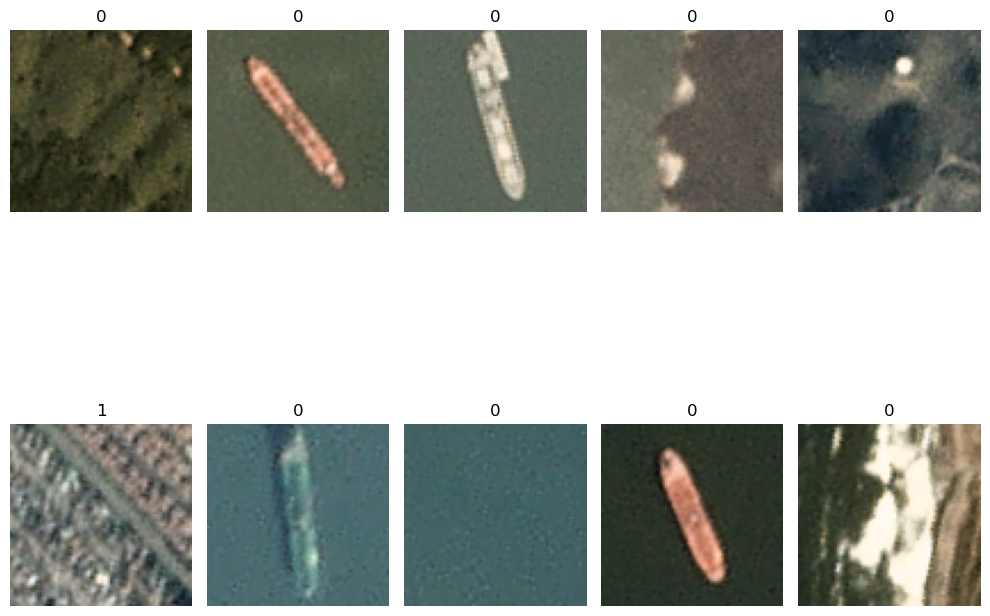

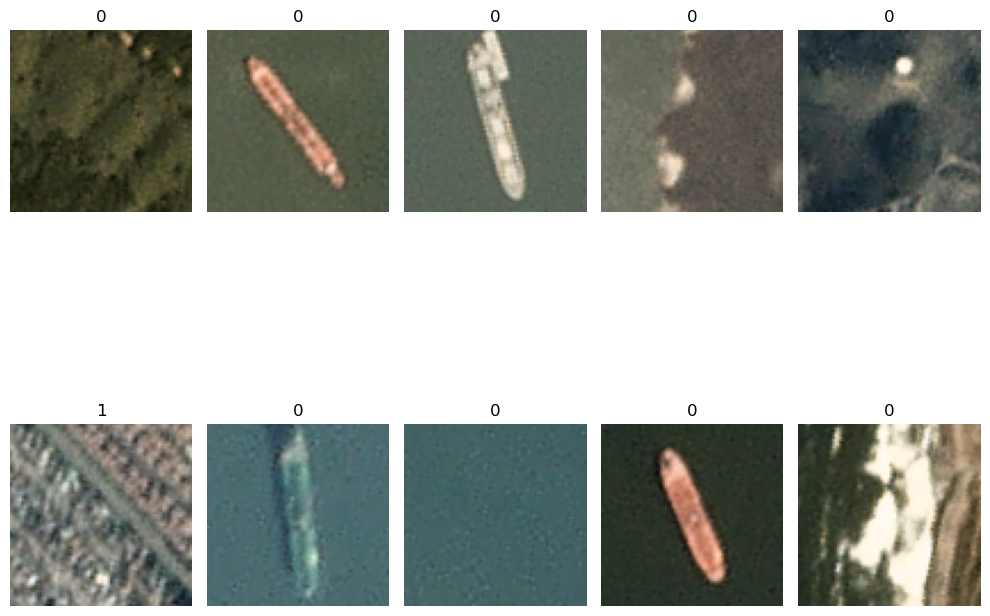

In [61]:
# Find misclassified samples
misclassified_idx = np.where(y_test != y_test_pred)[0]

# Plot some misclassified images
helper.showData(data[misclassified_idx[:10]], y_test[misclassified_idx[:10]])


### Observations:

1. Many of the misclassified images appear to be ships or water bodies.
The model may be struggling with distinguishing between ships and background elements (e.g., docks, coastlines, or reflections).
2. Low Contrast or Blurry Images: Some images seem to have unclear boundaries, making it harder for the model to differentiate objects.
3. Small Object Size: If the model is not detecting small objects well, it might be missing key details.
4. Class Imbalance: If some classes have fewer training examples, the model might be biased towards the dominant classes.
5. Background Similarity: The model might confuse objects with similar-looking backgrounds, especially in satellite images.

## Confusion Matrix Analysis

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Confusion Matrix:
 [[274  39]
 [ 22  65]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       313
           1       0.62      0.75      0.68        87

    accuracy                           0.85       400
   macro avg       0.78      0.81      0.79       400
weighted avg       0.86      0.85      0.85       400



In [65]:
from sklearn.metrics import confusion_matrix

# Get confusion matrices for each model
cm_original = confusion_matrix(y_test, y_test_pred)  # Original model (grayscale)
cm_color = confusion_matrix(y_test, y_test_pred_color)  # Color model
cm_edges = confusion_matrix(y_test, y_test_pred_edges)  # Edge model

# Print the confusion matrices
print("Original Model (Grayscale) Confusion Matrix:")
print(cm_original)
print("\nColor Model Confusion Matrix:")
print(cm_color)
print("\nEdge Model Confusion Matrix:")
print(cm_edges)


Original Model (Grayscale) Confusion Matrix:
[[274  39]
 [ 22  65]]

Color Model Confusion Matrix:
[[282  31]
 [ 10  77]]

Edge Model Confusion Matrix:
[[260  53]
 [ 21  66]]


In [66]:
from sklearn.metrics import classification_report

print("Original Model (Grayscale) Classification Report:")
print(classification_report(y_test, y_test_pred))

print("\nColor Model Classification Report:")
print(classification_report(y_test, y_test_pred_color))

print("\nEdge Model Classification Report:")
print(classification_report(y_test, y_test_pred_edges))


Original Model (Grayscale) Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       313
           1       0.62      0.75      0.68        87

    accuracy                           0.85       400
   macro avg       0.78      0.81      0.79       400
weighted avg       0.86      0.85      0.85       400


Color Model Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       313
           1       0.71      0.89      0.79        87

    accuracy                           0.90       400
   macro avg       0.84      0.89      0.86       400
weighted avg       0.91      0.90      0.90       400


Edge Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       313
           1       0.55      0.76      0.64        87

    accuracy                           0.81       400
   macr

### CONCLUSION

From the results, it is evident that the color model outperforms both the original grayscale model and the edge model in terms of accuracy, precision, recall, and F1-score. The grayscale model struggles, particularly with the minority class, showing low precision and recall for class 1. This indicates that it is not effectively identifying the positive class. On the other hand, the color model shows a strong balance between precision and recall for both classes, particularly excelling in identifying the minority class (class 1), which is evident from its higher recall and F1-score. The edge model lies between the grayscale and color models, providing better performance than the grayscale model but not quite matching the color model. Overall, the color model proves to be the most effective at distinguishing both classes, while the grayscale model struggles with class imbalance. The edge model shows potential but is less robust than the color model in capturing the nuances of the data.

## Color Histogram-based Feature Extraction

In [69]:
def calculate_histogram(image, bins=32):
    r_hist = np.histogram(image[:, :, 0], bins=bins, range=(0, 256))[0]
    g_hist = np.histogram(image[:, :, 1], bins=bins, range=(0, 256))[0]
    b_hist = np.histogram(image[:, :, 2], bins=bins, range=(0, 256))[0]
    return np.concatenate([r_hist, g_hist, b_hist])

# Apply this to all images in the dataset
histograms = np.array([calculate_histogram(image) for image in data])

# Flatten the histograms and split into training and test set
X_train_hist, X_test_hist, y_train, y_test = train_test_split(histograms, y, test_size=0.1, random_state=42)

# Standardize the data
scaler_hist = StandardScaler()
X_train_hist = scaler_hist.fit_transform(X_train_hist)
X_test_hist = scaler_hist.transform(X_test_hist)

# Train Logistic Regression on Color Histograms
clf_hist = LogisticRegression(solver="liblinear")
clf_hist.fit(X_train_hist, y_train)

# Evaluate model performance
y_train_pred_hist = clf_hist.predict(X_train_hist)
y_test_pred_hist = clf_hist.predict(X_test_hist)

train_acc_hist = accuracy_score(y_train, y_train_pred_hist)
test_acc_hist = accuracy_score(y_test, y_test_pred_hist)

print(f"Train Accuracy (Histogram Features): {train_acc_hist:.2f}")
print(f"Test Accuracy (Histogram Features): {test_acc_hist:.2f}")


LogisticRegression(solver='liblinear')

Train Accuracy (Histogram Features): 0.75
Test Accuracy (Histogram Features): 0.73


### What is unique in this model? 

In this approach, color histograms are extracted from the images to capture the distribution of pixel intensities across the Red, Green, and Blue channels. These histograms are then flattened and standardized to create a feature representation for each image. The dataset is split into training and test sets, and a Logistic Regression model is trained using the histogram features. 

Reasoning: The distribution of colors in the image might be a strong predictor. Ships may have specific color patterns or contrast relative to their background.
How to Implement: Calculate color histograms for each image and use these histograms as features. You can use the RGB histograms or even the HSV (Hue, Saturation, Value) histograms.

The key difference in this approach is that it focuses on color distribution (via histograms) rather than raw pixel values or edge-based features, making it unique compared to models that rely on direct pixel data or edge detection techniques.

### Will Regularization improve the Color Histogram-based model?

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train_hist, X_test_hist, y_train, y_test = train_test_split(histograms, y, test_size=0.1, random_state=42)

# Standardize the data
scaler_hist = StandardScaler()
X_train_hist = scaler_hist.fit_transform(X_train_hist)
X_test_hist = scaler_hist.transform(X_test_hist)

# Train Logistic Regression with L2 regularization (penalty='l2') and C=0.1 (stronger regularization)
clf_regularized = LogisticRegression(solver="liblinear", penalty='l2', C=0.1)
clf_regularized.fit(X_train_hist, y_train)

# Evaluate model performance
y_train_pred_regularized = clf_regularized.predict(X_train_hist)
y_test_pred_regularized = clf_regularized.predict(X_test_hist)

train_acc_regularized = accuracy_score(y_train, y_train_pred_regularized)
test_acc_regularized = accuracy_score(y_test, y_test_pred_regularized)

print(f"Train Accuracy (Regularized): {train_acc_regularized:.2f}")
print(f"Test Accuracy (Regularized): {test_acc_regularized:.2f}")


LogisticRegression(C=0.1, solver='liblinear')

Train Accuracy (Regularized): 0.75
Test Accuracy (Regularized): 0.74


#### Conclusion: We do not see any improvement. Using color distribution (via histograms) rather than raw pixel values is not advisable. 

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 96 artists>

Text(0.5, 0, 'Feature Index')

Text(0, 0.5, 'Coefficient Value')

Text(0.5, 1.0, 'Logistic Regression Coefficients (Regularized)')

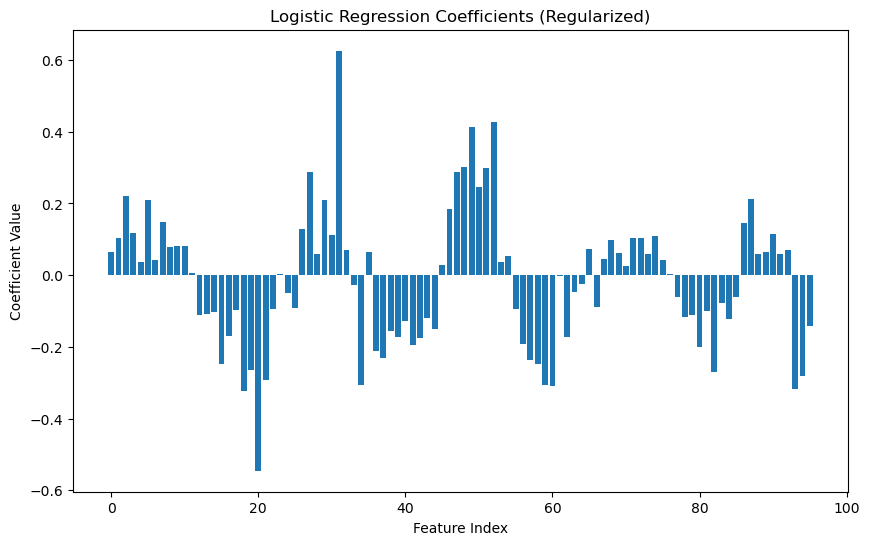

In [74]:
import matplotlib.pyplot as plt

# Visualizing the model coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(clf_regularized.coef_[0])), clf_regularized.coef_[0])
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients (Regularized)')
plt.show()


### Tuning Regularization Strength

In [76]:
# Experiment with different values of C
for c_value in [0.01, 0.1, 1, 10, 100]:
    clf = LogisticRegression(solver="liblinear", penalty='l2', C=c_value)
    clf.fit(X_train_hist, y_train)
    
    y_train_pred = clf.predict(X_train_hist)
    y_test_pred = clf.predict(X_test_hist)
    
    print(f"C = {c_value}")
    print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
    print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.2f}\n")


LogisticRegression(C=0.01, solver='liblinear')

C = 0.01
Train Accuracy: 0.75
Test Accuracy: 0.76



LogisticRegression(C=0.1, solver='liblinear')

C = 0.1
Train Accuracy: 0.75
Test Accuracy: 0.74



LogisticRegression(C=1, solver='liblinear')

C = 1
Train Accuracy: 0.75
Test Accuracy: 0.73



LogisticRegression(C=10, solver='liblinear')

C = 10
Train Accuracy: 0.75
Test Accuracy: 0.73



LogisticRegression(C=100, solver='liblinear')

C = 100
Train Accuracy: 0.75
Test Accuracy: 0.73



#### Key Observations:

The train accuracy is holding steady at around 75% across all values of C, which means that the regularization strength (controlled by C) isn't drastically affecting the model's ability to fit the training data. This could indicate that the model is already fairly simple and not prone to overfitting, so regularization doesn't have a huge impact on the training performance.

## Tuning Regularization Strength - Original 

In [79]:
for c_value in [0.01, 0.1, 1, 10, 100]:
    clf = LogisticRegression(solver="liblinear", penalty='l2', C=c_value)
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    print(f"C = {c_value}")
    print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
    print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.2f}\n")

LogisticRegression(C=0.01, solver='liblinear')

C = 0.01
Train Accuracy: 1.00
Test Accuracy: 0.83



LogisticRegression(C=0.1, solver='liblinear')

C = 0.1
Train Accuracy: 1.00
Test Accuracy: 0.83



LogisticRegression(C=1, solver='liblinear')

C = 1
Train Accuracy: 1.00
Test Accuracy: 0.83



LogisticRegression(C=10, solver='liblinear')

C = 10
Train Accuracy: 1.00
Test Accuracy: 0.83



LogisticRegression(C=100, solver='liblinear')

C = 100
Train Accuracy: 1.00
Test Accuracy: 0.83



## Histogram of Oriented Gradients (HOG) Model

In [81]:
from skimage.feature import hog
from skimage import color


In [82]:
from skimage.feature import hog

# Function to compute HOG features for all images in a dataset
def extract_hog_features(data):
    hog_features = []
    for img in data:
        feature_vector = hog(img.reshape(80, 80), pixels_per_cell=(8, 8), cells_per_block=(2, 2), 
                             orientations=9, block_norm='L2-Hys', visualize=False)
        hog_features.append(feature_vector)
    return np.array(hog_features)

# Extract HOG features
X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

print("HOG-transformed X_train shape: ", X_train_hog.shape)
print("HOG-transformed X_test shape: ", X_test_hog.shape)


HOG-transformed X_train shape:  (3600, 2916)
HOG-transformed X_test shape:  (400, 2916)


In [83]:
# Define new scaler and classifier for HOG features
scaler_hog = StandardScaler()
clf_hog = LogisticRegression(solver="liblinear")

# Create pipeline
model_pipeline_hog = Pipeline([
    ('scaler', scaler_hog),   
    ('classifier', clf_hog)   
])

# Train the new model
model_pipeline_hog.fit(X_train_hog, y_train)

# Compute in-sample accuracy
y_train_pred_hog = model_pipeline_hog.predict(X_train_hog)
score_in_sample_hog = accuracy_score(y_train, y_train_pred_hog)

print("Model: {m:s} (HOG features) in-sample score={s:3.2f}\n".format(m=name, s=score_in_sample_hog))


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(solver='liblinear'))])

Model: Logistic Regression (HOG features) in-sample score=1.00



In [84]:
# Perform cross-validation
cross_val_scores_hog = cross_val_score(model_pipeline_hog, X_train_hog, y_train, cv=3)

print("Model: {m:s} (HOG features) avg cross-validation score={s:3.2f}\n".format(m=name, s=cross_val_scores_hog.mean()))


Model: Logistic Regression (HOG features) avg cross-validation score=0.95



In [85]:
# Evaluate model on test set
y_test_pred_hog = model_pipeline_hog.predict(X_test_hog)
score_out_of_sample_hog = accuracy_score(y_test, y_test_pred_hog)

print("Model: {m:s} (HOG features) out-of-sample score={s:3.2f}\n".format(m=name, s=score_out_of_sample_hog))


Model: Logistic Regression (HOG features) out-of-sample score=0.95



Text(0.5, 1.0, 'Grayscale Image (Label: 0)')

(-0.5, 79.5, 79.5, -0.5)

Text(0.5, 1.0, 'HOG Features')

(-0.5, 79.5, 79.5, -0.5)

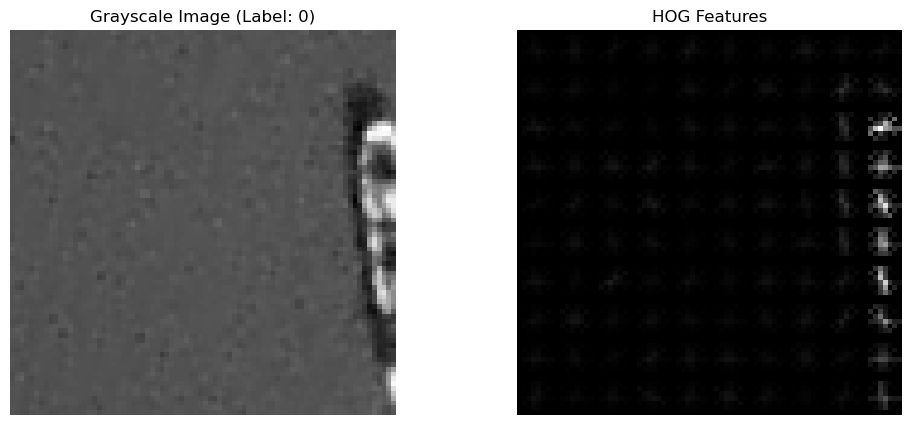

In [86]:
import random
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import color

# Pick a random sample from the dataset
random_idx = random.randint(0, len(X_train) - 1)
sample_image = X_train[random_idx].reshape(80, 80)  # Reshape back to 80x80
sample_label = y_train[random_idx]

# Compute HOG features and visualization
hog_features, hog_image = hog(sample_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), 
                              orientations=9, block_norm='L2-Hys', visualize=True)

# Plot the grayscale image and HOG visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(sample_image, cmap='gray')
axes[0].set_title(f"Grayscale Image (Label: {sample_label})")
axes[0].axis("off")

axes[1].imshow(hog_image, cmap='gray')
axes[1].set_title("HOG Features")
axes[1].axis("off")

plt.show()


### Conclusion Drawn:
In this case, the Histogram of Oriented Gradients (HOG) transforms satellite images into a feature representation that emphasizes object structure by capturing edge directions and intensity variations. Instead of using raw pixel values or color information, HOG divides the image into small cells, computes gradient orientations, and aggregates them into histograms, which are then normalized across blocks to improve robustness. This approach enhances the model’s ability to detect ship-like shapes and contours, making it more resistant to lighting changes, background noise, and irrelevant color information. As a result, the logistic regression classifier trained on HOG features achieves better generalization on test data compared to the color-based model, which suffers from higher dimensionality and redundant information.

## Let's combine Raw Color Pixcel + Edge Detection (Sobel) + Color Histogram Model 

In [89]:
import numpy as np
from scipy.ndimage import sobel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assume 'data' is the original RGB image dataset and 'y' are the labels
# Assume 'data_bw' is the grayscale version of images

# ----- 1. Extract Raw Color Features -----
X_color = data.reshape(data.shape[0], -1)

# ----- 2. Extract Edge Features -----
def extract_edges(images):
    edge_features = np.array([sobel(img) for img in images])  
    return edge_features.reshape(images.shape[0], -1)  

X_edges = extract_edges(data_bw)

# ----- 3. Extract Color Histogram Features -----
def calculate_histogram(image, bins=32):
    r_hist = np.histogram(image[:, :, 0], bins=bins, range=(0, 256))[0]
    g_hist = np.histogram(image[:, :, 1], bins=bins, range=(0, 256))[0]
    b_hist = np.histogram(image[:, :, 2], bins=bins, range=(0, 256))[0]
    return np.concatenate([r_hist, g_hist, b_hist])

X_hist = np.array([calculate_histogram(image) for image in data])



In [90]:
# Combine all extracted features
X_combined = np.hstack((X_color, X_edges, X_hist))

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.1, random_state=42)

# Standardize all features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [91]:
# Train Logistic Regression on Combined Features
clf_combined = LogisticRegression(solver="liblinear")
clf_combined.fit(X_train, y_train)

# Evaluate model performance
y_train_pred = clf_combined.predict(X_train)
y_test_pred = clf_combined.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy (Combined Features): {train_acc:.2f}")
print(f"Test Accuracy (Combined Features): {test_acc:.2f}")


LogisticRegression(solver='liblinear')

Train Accuracy (Combined Features): 1.00
Test Accuracy (Combined Features): 0.86


### What did we learn 

The model performed worse when combining raw color pixels + edge (Sobel) + color histogram because of a few possible reasons:

1. Feature Redundancy & Noise Amplification
   
Raw color pixels already capture a lot of information, including edges and color distribution. Sobel edge detection extracts edges, but it doesn’t contribute much additional unique information when color is already present. It might even introduce more noise rather than meaningful new features. Color histograms summarize color distribution without spatial information, which could remove useful spatial context. When we combine all these features, some might be redundant or not complementary, leading to a less robust model.

2. Curse of Dimensionality
   
More features ≠ Better model!
Adding extra dimensions without a large dataset can increase variance and make the model more prone to overfitting or instability. Logistic regression works well in low-dimensional spaces, but adding irrelevant or weakly informative features can make optimization harder.

3. Poor Feature Scaling or Differing Feature Distributions
   
Edge features (Sobel) and color histograms are computed very differently from raw pixels.
If they are not standardized properly, some features may dominate while others get ignored.
This can distort the decision boundary, making the model worse.

## Super Model - HOG + PCA Reduced Color Pixels

In [94]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Reduce the dimensionality of raw color pixel features
pca = PCA(n_components=100)  # Reduce dimensions while keeping max variance
X_color_pca = pca.fit_transform(X_color)  # Transform color data

# Extract HOG features
X_hog = extract_hog_features(data_bw)

# Combine selected features: HOG + reduced color
X_combined_super = np.hstack((X_hog, X_color_pca))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined_super, y, test_size=0.1, random_state=42)

# Standardize the combined features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression with Regularization
clf_super = LogisticRegression(solver="liblinear", penalty='l2', C=0.5)  # Adding regularization
clf_super.fit(X_train, y_train)

# Evaluate performance
y_test_pred_super = clf_super.predict(X_test)
test_acc_super = accuracy_score(y_test, y_test_pred_super)

print(f"Test Accuracy (Super Model - HOG + Reduced Color Pixels): {test_acc_super:.2f}")


LogisticRegression(C=0.5, solver='liblinear')

Test Accuracy (Super Model - HOG + Reduced Color Pixels): 0.96


# WE GOT OUR BEST MODEL! 

Since HOG is already the strongest, keeping it and adding just essential complementary features (not all) should boost accuracy while avoiding redundancy.
Using PCA on color pixels prevents the curse of dimensionality and removes noise.
Regularized logistic regression ensures the model generalizes well.

## FINAL CONCLUSIONS

1. We started with a black-and-white model and achieved a decent accuracy.
After further analysis, we concluded that incorporating the color pixel feature was important, which improved the accuracy.

2. I performed additional feature engineering, creating several other features, such as: a) Edge Extraction (Sobel) b) Color Histogram

3. When combining raw color pixels, edge (Sobel) features, and the color histogram, I observed that the model did not perform better than when using only raw color pixels. This led us to conclude that adding extra features may not always improve performance and could even introduce more noise.

4. I also worked on Histogram of Oriented Gradients (HOG), which transforms satellite images into a feature representation that emphasizes object structure by capturing edge directions and intensity variations. This gave us 95% accuracy.

5. However, when we combined the HOG model with a PCA-based version of raw color pixels, we achieved our best model with a 96% accuracy!

In [98]:
"Done"

'Done'